# Project BigData 
<i> Karolina Tatarczyk 100% (wspólnie) </i>  
<i> Antoni Perużyński 100% (wspólnie) </i>
## Fuzzy logic classificator for dataset *Iris*


The aim of the project is to create a fuzzy classifier that creates various membership functions and fuzzy rules based on the available base.
The fuzzy system consists of individual steps:
- fuzzification (the project uses different approaches to create membership functions, using: minimum, maximum, mean, median, quantiles)
- rule base (the number of rules is equal to the number of classes - we do not have sufficient knowledge of what will happen when different linguistic values of different species are mixed together)
- inference (different approaches to inference were used: sum of scores obtained for each attribute, product, maximum, mean)
- defuzzification (the defuzzification process involves selecting the species for which the rule result gives the highest value)

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Data reading and preprocessing

The Iris database contains data of parameters describing three species of iris: Iris Setosa, Iris Versicolor and Iris Virginica. The database consists of 150 records. Each record, in addition to the species of iris, which is a decision attribute, also contains four continuous attributes:
- Sepal length,
- Sepal width,
- Petal length,
- Petal width.

The values of a given decision attribute divide the collection into subsets, consisting of records representing each species. Each Iris species contains 50 records describing the flowers of the species.

Source of data: https://gist.github.com/netj/8836201

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path= f'/content/drive/MyDrive/data/Fuzzy/iris.csv'
df = pd.read_csv(path)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df1 = df.reset_index()

For each species, we are able to calculate the ranges in which the
the attributes concerned. There will therefore be 12 such compartments. We have presented histograms for each attribute and species.

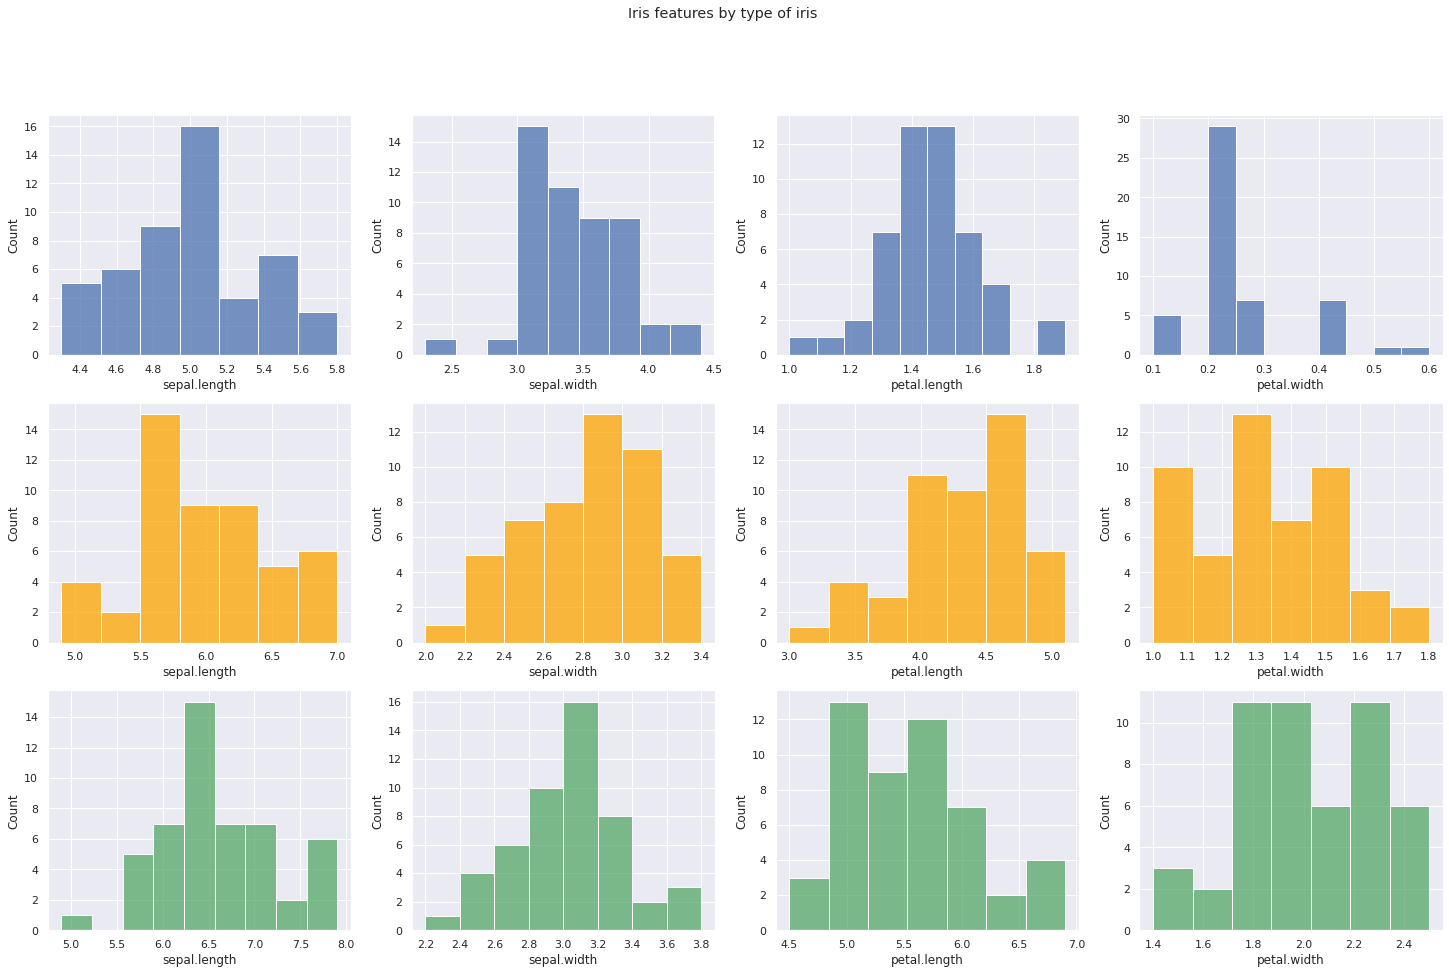

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(25, 15))

fig.suptitle('Iris features by type of iris')

sns.histplot(ax=axes[0, 0], data=df[df["variety"] == "Setosa"], x='sepal.length')
sns.histplot(ax=axes[0, 1], data=df[df["variety"] == "Setosa"], x='sepal.width')
sns.histplot(ax=axes[0, 2], data=df[df["variety"] == "Setosa"], x='petal.length')
sns.histplot(ax=axes[0, 3], data=df[df["variety"] == "Setosa"], x='petal.width')

sns.histplot(ax=axes[1, 0], data=df[df["variety"] == "Versicolor"], x='sepal.length', color = 'orange')
sns.histplot(ax=axes[1, 1], data=df[df["variety"] == "Versicolor"], x='sepal.width', color = 'orange')
sns.histplot(ax=axes[1, 2], data=df[df["variety"] == "Versicolor"], x='petal.length', color = 'orange')
sns.histplot(ax=axes[1, 3], data=df[df["variety"] == "Versicolor"], x='petal.width', color = 'orange')

sns.histplot(ax=axes[2, 0], data=df[df["variety"] == "Virginica"], x='sepal.length', color = 'g')
sns.histplot(ax=axes[2, 1], data=df[df["variety"] == "Virginica"], x='sepal.width', color = 'g')
sns.histplot(ax=axes[2, 2], data=df[df["variety"] == "Virginica"], x='petal.length', color = 'g')
sns.histplot(ax=axes[2, 3], data=df[df["variety"] == "Virginica"], x='petal.width', color = 'g')

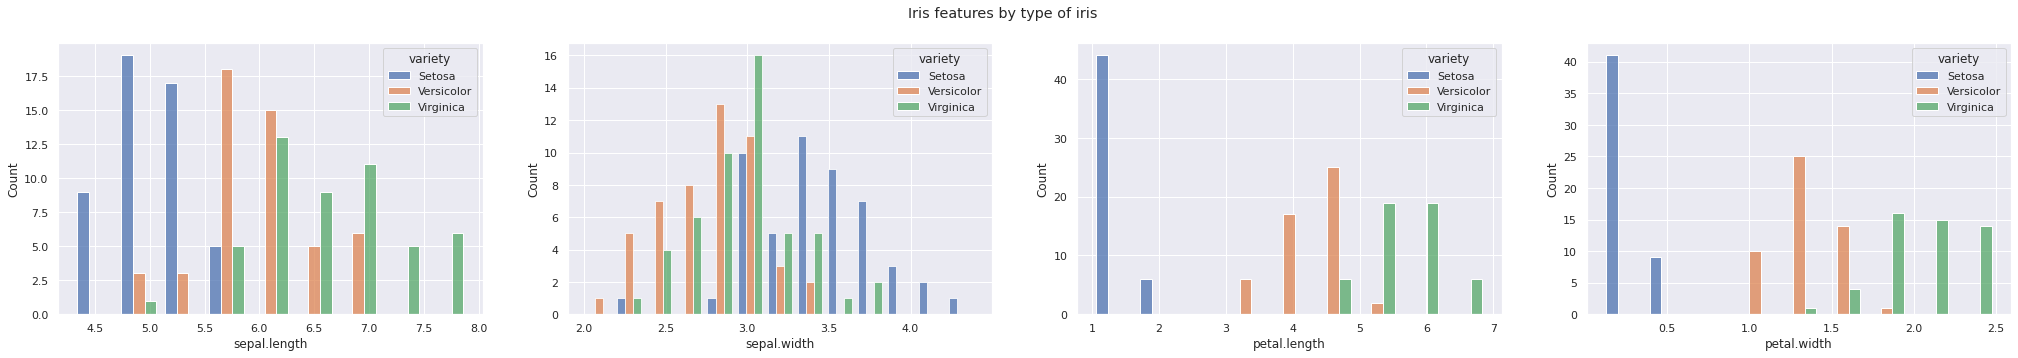

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(35, 5))

fig.suptitle('Iris features by type of iris')

sns.histplot(ax=axes[0], data=df, x="sepal.length", hue="variety", multiple="dodge", shrink=.8)
sns.histplot(ax=axes[1],data=df, x="sepal.width", hue="variety", multiple="dodge", shrink=.8)
sns.histplot(ax=axes[2],data=df, x="petal.length", hue="variety", multiple="dodge", shrink=.8)
sns.histplot(ax=axes[3],data=df, x="petal.width", hue="variety", multiple="dodge", shrink=.8)

In [ ]:
# sns.histplot(data=df, x="sepal.length", hue="variety")

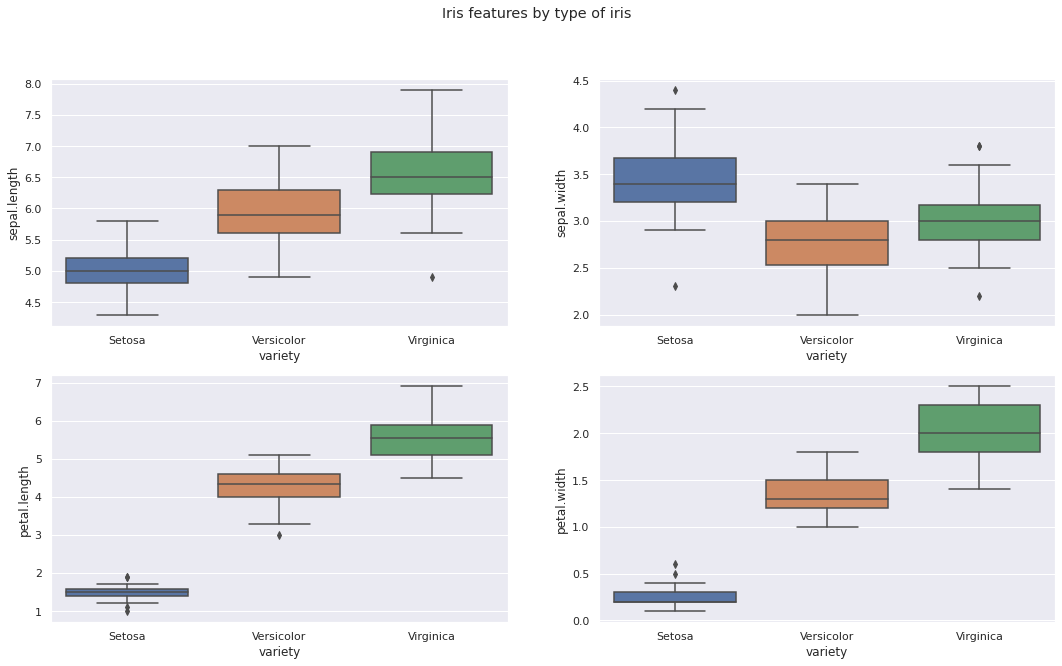

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Iris features by type of iris')

sns.boxplot(ax=axes[0, 0], data=df, x='variety', y='sepal.length')
sns.boxplot(ax=axes[0, 1], data=df, x='variety', y='sepal.width')
sns.boxplot(ax=axes[1, 0], data=df, x='variety', y='petal.length')
sns.boxplot(ax=axes[1, 1], data=df, x='variety', y='petal.width')

## Show how to calculate step by step

### Splitting data for training and test sets
In order to test the accuracy of the membership function search algorithm, it is necessary to divide the database into a training set, from which the
values describing the membership functions will be calculated from, and a validation set, which will verify the correctness of the results obtained. The database is shuffled randomly, so each time the programme is switched on, it will be based on a different training set.

In [ ]:
X_train, X_test = train_test_split(df, test_size=0.30)

### Splitting data for each category of Iris. [Setosa, Versicolor, Virginica]
We then divide the training set into subclasses representing each flower species.

In [ ]:
setosaTrain = X_train[X_train['variety'] == 'Setosa']
versicolorTrain = X_train[X_train['variety'] == 'Versicolor']
virginicaTrain = X_train[X_train['variety'] == 'Virginica']

### Functions to calculate coefficiants for trapese function
Below, functions have been implemented that extract the values $a, b, c, d$ that will define the shape of the trapezoidal membership function. These parameters are determined using various statistical values: mean, median, minimum, maximum, etc.


In [ ]:
def calculateCoeff(df, i: int):
  a = df.iloc[:,i].min() - 0.001
  d = df.iloc[:,i].max() + 0.001
  mean = df.iloc[:,i].mean()
  dfL = df[df.iloc[:,i] <= mean]
  dfR = df[df.iloc[:,i] > mean]
  b = dfL.iloc[:,i].mean()
  c = dfR.iloc[:,i].mean()
  return [a,b,c,d]

In [ ]:
def calculateCoeffQuantile(df, i: int):
  a = df.iloc[:,i].min() - 0.001
  d = df.iloc[:,i].max() + 0.001
  b = df.iloc[:,i].quantile(0.3)
  c = df.iloc[:,i].quantile(0.7)
  return [a,b,c,d]

In [ ]:
def calculateCoeffMedian(df, i: int):
  a = df.iloc[:,i].min() - 0.001
  d = df.iloc[:,i].max() + 0.001
  median = df.iloc[:,i].median()
  dfL = df[df.iloc[:,i] <= median]
  dfR = df[df.iloc[:,i] > median]
  b = dfL.iloc[:,i].median()
  c = dfR.iloc[:,i].median()
  return [a,b,c,d]

### Membership functions
A trapezoidal function is implemented below, which takes parameters that determine the shape of the function. Of course, there can be various other membership functions such as a Gaussian function or a triangular function. However, we have chosen the trapezoidal function.

In [ ]:
def trapezeFunction(x: float, coeff):
  mu = 0
  a = coeff[0]
  b = coeff[1]
  c = coeff[2]
  d = coeff[3] 
  if x<= a:
    mu = 0
  elif x<=b:
    mu = (x-a)/(b-a)
  elif x<=c:
    mu = 1
  elif x<=d:
    mu = (d-x)/(d-c)
  else:
    mu = 0
  return mu

### Calculate coefficiants for every feature for every class in dataset
Now the coefficients for each attribute and each species are calculated (4 attributes * 3 species = 12 sets of coefficients)

In [ ]:
setosaSL = calculateCoeffMedian(setosaTrain, 0)
setosaSW = calculateCoeff(setosaTrain, 1)
setosaPL = calculateCoeff(setosaTrain, 2)
setosaPW = calculateCoeff(setosaTrain, 3)

In [ ]:
versicolorSL = calculateCoeff(versicolorTrain, 0)
versicolorSW = calculateCoeff(versicolorTrain, 1)
versicolorPL = calculateCoeff(versicolorTrain, 2)
versicolorPW = calculateCoeff(versicolorTrain, 3)

In [ ]:
virginicaSL = calculateCoeff(virginicaTrain, 0)
virginicaSW = calculateCoeff(virginicaTrain, 1)
virginicaPL = calculateCoeff(virginicaTrain, 2)
virginicaPW = calculateCoeff(virginicaTrain, 3)

In [ ]:
def GraphSL(setosa, versi, virginica, title):
    y = [0, 0, 1, 1, 0, 0]
    a = min(setosa[0], versi[0], virginica[0]) - 0.3 #Create beggining of interval 
    b = max(setosa[-1], versi[-1], virginica[-1]) + 0.3 ##Create end of interval 

    x1 = setosa.copy()
    x1.insert(0, a)
    x1.append(b)

    x2 = versi.copy()
    x2.insert(0, a)
    x2.append(b)

    x3 = virginica.copy()
    x3.insert(0, a)
    x3.append(b)

    plt.figure(figsize=(10, 5))
    plt.plot(x1, y, color='r', label='setosa')
    plt.plot(x2, y, color='b', label='versicolor')
    plt.plot(x3, y, color='g', label='virginica')
    plt.title(title)
    plt.legend()
    #plt.plot(X, z, color='g', label='cos')
    plt.show()
    return 0

We have outlined the membership functions below. Different attributes have been presented in each graph.

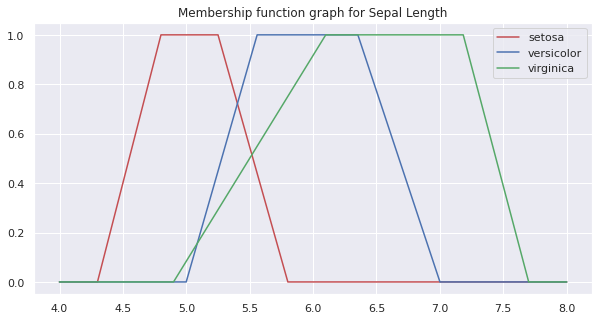

0

In [ ]:
GraphSL(setosaSL, versicolorSL, virginicaSL, "Membership function graph for Sepal Length")

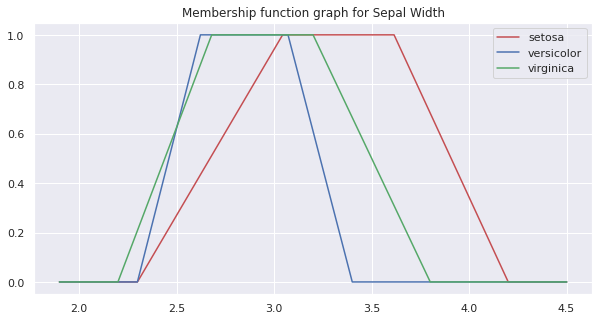

0

In [ ]:
GraphSL(setosaSW, versicolorSW, virginicaSW, "Membership function graph for Sepal Width")

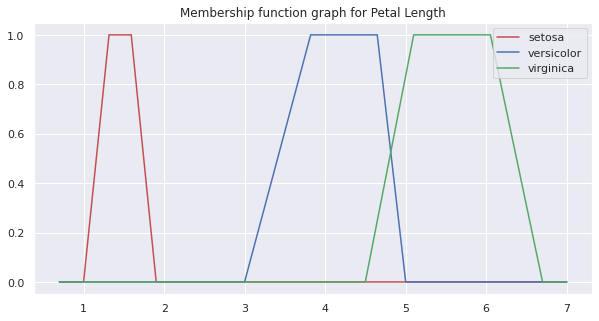

0

In [ ]:
GraphSL(setosaPL, versicolorPL, virginicaPL, "Membership function graph for Petal Length")

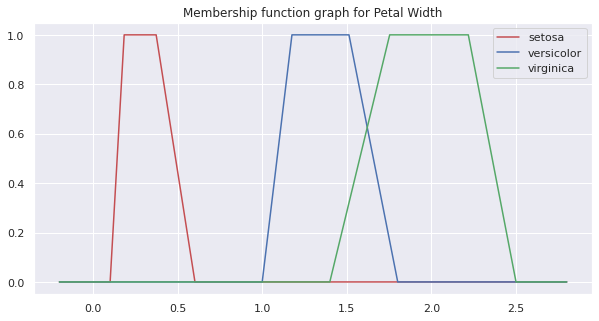

0

In [ ]:
GraphSL(setosaPW, versicolorPW, virginicaPW, "Membership function graph for Petal Width")

In [ ]:
X_test['predict'] = 0
X_test = X_test.reset_index(drop=True)

### Calculate accuracy for testing dataset
The determination of all membership functions, inference and defuzzification were performed sequentially.
The formulas used in the inference process are:
- product,
- maximum,
- sum,
- average,
- median.

The sharpening process then selects the species for which the inference value is highest.

Finally, the accuracy of the classifier is verified by comparing the classification results obtained with the actual flower species.

In [ ]:
for i in range(len(X_test)):
  x = X_test.iloc[i,0]
  s1 = trapezeFunction(x, setosaSL)
  vc1 = trapezeFunction(x, versicolorSL)
  v1 = trapezeFunction(x, virginicaSL)

  x = X_test.iloc[i,1]
  s2 = trapezeFunction(x, setosaSW)
  vc2 = trapezeFunction(x, versicolorSW)
  v2 = trapezeFunction(x, virginicaSW)

  x = X_test.iloc[i,2]
  s3 = trapezeFunction(x, setosaPL)
  vc3 = trapezeFunction(x, versicolorPL)
  v3 = trapezeFunction(x, virginicaPL)

  x = X_test.iloc[i,3]
  s4 = trapezeFunction(x, setosaPW)
  vc4 = trapezeFunction(x, versicolorPW)
  v4 = trapezeFunction(x, virginicaPW)


  # arg = np.argmax(np.array([s1*s2*s3*s4, vc1*vc2*vc3*vc4, v1*v2*v3*v4]))
  # arg = np.argmax(np.array([s1+s2+s3+s4, vc1+vc2+vc3+vc4, v1+v2+v3+v4]))
  # arg = np.argmax(np.array([max(s1,s2,s3,s4), max(vc1,vc2,vc3,vc4), max(v1,v2,v3,v4)]))
  arg = np.argmax(np.array([np.mean([s1,s2,s3,s4]), np.mean([vc1,vc2,vc3,vc4]), np.mean([v1,v2,v3,v4])]))
  #arg = np.argmax(np.array([np.median([s1,s2,s3,s4]), np.median([vc1,vc2,vc3,vc4]), np.median([v1,v2,v3,v4])]))


  if arg == 0:
    X_test.loc[i,'predict'] = "Setosa"
  elif arg == 1:
    X_test.loc[i,'predict'] = "Versicolor"
  else: 
    X_test.loc[i,'predict'] = "Virginica"

sum = 0
for i in range(len(X_test)):
  if (X_test.loc[i,'variety'] == X_test.loc[i,'predict']):
    sum += 1
sum/len(X_test)

0.9111111111111111

## Calculate accuracy for algorithm using crossing validation

In [ ]:
accuracy = []
presicion = []
sensitive =[]

for k in range(0,100):
  X_train, X_test = train_test_split(df, test_size=0.30)

  setosaTrain = X_train[X_train['variety'] == 'Setosa']
  versicolorTrain = X_train[X_train['variety'] == 'Versicolor']
  virginicaTrain = X_train[X_train['variety'] == 'Virginica']

  setosaSL = calculateCoeff(setosaTrain, 0) #calculateCoeffQuantile
  setosaSW = calculateCoeff(setosaTrain, 1) #calculateCoeffMedian
  setosaPL = calculateCoeff(setosaTrain, 2) #calculateCoeff
  setosaPW = calculateCoeff(setosaTrain, 3)

  versicolorSL = calculateCoeff(versicolorTrain, 0) 
  versicolorSW = calculateCoeff(versicolorTrain, 1)
  versicolorPL = calculateCoeff(versicolorTrain, 2)
  versicolorPW = calculateCoeff(versicolorTrain, 3)

  virginicaSL = calculateCoeff(virginicaTrain, 0)
  virginicaSW = calculateCoeff(virginicaTrain, 1)
  virginicaPL = calculateCoeff(virginicaTrain, 2)
  virginicaPW = calculateCoeff(virginicaTrain, 3)

  X_test['predict'] = 0
  X_test.index = range(len(X_test.index))

  for i in range(len(X_test)):
    x = X_test.iloc[i,0]
    s1 = trapezeFunction(x, setosaSL)
    vc1 = trapezeFunction(x, versicolorSL)
    v1 = trapezeFunction(x, virginicaSL)

    x = X_test.iloc[i,1]
    s2 = trapezeFunction(x, setosaSW)
    vc2 = trapezeFunction(x, versicolorSW)
    v2 = trapezeFunction(x, virginicaSW)

    x = X_test.iloc[i,2]
    s3 = trapezeFunction(x, setosaPL)
    vc3 = trapezeFunction(x, versicolorPL)
    v3 = trapezeFunction(x, virginicaPL)

    x = X_test.iloc[i,3]
    s4 = trapezeFunction(x, setosaPW)
    vc4 = trapezeFunction(x, versicolorPW)
    v4 = trapezeFunction(x, virginicaPW)



    #arg = np.argmax(np.array([s1*s2*s3*s4, vc1*vc2*vc3*vc4, v1*v2*v3*v4]))
    #arg = np.argmax(np.array([s1+s2+s3+s4, vc1+vc2+vc3+vc4, v1+v2+v3+v4]))
    #arg = np.argmax(np.array([max(s1,s2,s3,s4), max(vc1,vc2,vc3,vc4), max(v1,v2,v3,v4)]))
    #arg = np.argmax(np.array([np.mean([s1,s2,s3,s4]), np.mean([vc1,vc2,vc3,vc4]), np.mean([v1,v2,v3,v4])]))
    arg = np.argmax(np.array([np.median([s1,s2,s3,s4]), np.median([vc1,vc2,vc3,vc4]), np.median([v1,v2,v3,v4])]))

    if arg == 0:
      X_test.loc[i,'predict'] = "Setosa"
    elif arg == 1:
      X_test.loc[i,'predict'] = "Versicolor"
    else: 
      X_test.loc[i,'predict'] = "Virginica"

  sum = 0
  for i in range(len(X_test)):
    if (X_test.loc[i,'variety'] == X_test.loc[i,'predict']):
      sum += 1
  accuracy.append(sum/len(X_test))

  sensSetosa = len(X_test[(X_test['predict']=="Setosa") & (X_test["variety"]=="Setosa")])/len(X_test[X_test["variety"]=='Setosa'])
  sensVersi = len(X_test[(X_test['predict']=="Versicolor") & (X_test["variety"]=="Versicolor")])/len(X_test[X_test["variety"]=='Versicolor'])
  sensVirgi = len(X_test[(X_test['predict']=="Virginica") & (X_test["variety"]=="Virginica")])/len(X_test[X_test["variety"]=='Virginica'])

  precSetosa = len(X_test[(X_test['predict']=="Setosa") & (X_test["variety"]=="Setosa")])/len(X_test[X_test["predict"]=='Setosa'])
  precVersi = len(X_test[(X_test['predict']=="Versicolor") & (X_test["variety"]=="Versicolor")])/len(X_test[X_test["predict"]=='Versicolor'])
  precVirgi = len(X_test[(X_test['predict']=="Virginica") & (X_test["variety"]=="Virginica")])/len(X_test[X_test["predict"]=='Virginica'])

  sensitive.append(np.mean([sensSetosa, sensVersi, sensVirgi]))
  presicion.append(np.mean([precSetosa, precVersi, precVirgi]))


  sensSetosa = 0

print(f" The accuracy is: {np.mean(accuracy)}")
print(f" Sensitivity is: {np.mean(sensitive)}")
print(f" Precision is: {np.mean(presicion)}")

 The accuracy is: 0.9371111111111111
 Sensitivity is: 0.9378125722173709
 Precision is: 0.9388341171642256


### Czułość

In [ ]:
#len(X_test[(X_test['predict']=="Setosa") & (X_test["variety"]=="Setosa")])/len(X_test[X_test["variety"]=='Setosa'])

1.0

In [ ]:
#len(X_test[(X_test['predict']=="Versicolor") & (X_test["variety"]=="Versicolor")])/len(X_test[X_test["variety"]=='Versicolor'])

0.8666666666666667

In [ ]:
#len(X_test[(X_test['predict']=="Virginica") & (X_test["variety"]=="Virginica")])/len(X_test[X_test["variety"]=='Virginica'])

1.0

## Precision

In [ ]:
#prec = len(X_test[(X_test['predict']=="Setosa") & (X_test["variety"]=="Setosa")])/len(X_test[X_test["predict"]=='Setosa'])

In [ ]:
#b = len(X_test[(X_test['predict']=="Versicolor") & (X_test["variety"]=="Versicolor")])/len(X_test[X_test["predict"]=='Versicolor'])

In [ ]:
#c = len(X_test[(X_test['predict']=="Virginica") & (X_test["variety"]=="Virginica")])/len(X_test[X_test["predict"]=='Virginica'])

In [ ]:
#(a+b+c)/3

0.9523809523809524

## Results for accuracy
For crossvalidation 100 times  
For each type of function to calculate coefficiant to trapese function [Original, Quantile Median]  
For every way to calculate arg [*, +, max, mean, median]


1.   Original
*   "*" = 0.88466
*   "+" = 0.92222
*   max = 0.66244
*   mean = 0.92288
*   median = 0.94022 (n=10000: *0.9371133333333334* time = 7:54)

2.   Quantile
*   "*" = 0.89511
*   "+" = 0.90911
*   max = 0.67355
*   mean = 0.91533
*   median = 0.94466 (n=10000: *0.9397222222222222* time = 8:17)

3.   Median
*   "*" = 0.88933
*   "+" = 0.91733
*   max = 0.62177
*   mean = 0.92177
*   median = 0.94222 (n=10000: *0.9370755555555556*  time = 8:31)






The above results show that the best method during the inference process for the classifier is to use the median. An alternative, method is the mean.

## Summary


We created fuzzy classifier for *Iris* dataset which at the end of operation performs defuzzification. It is giving us as a result class for given values of features. We got really good scores for this classifier. We got the best  accuracy equal to  0.945 and recall equal to 0.939, so F1 score is high. We have to remember that we are not training our classifier in each iteration. We are doing it only at the begging of algorithm. Nevertheless, we received  satisfactory  results. Next idea for this classifier is create classifier for unique dataset. It will give us more knowledge about our fuzzy classifier and  then we will able to improve it. Second idea to be developed is improve way of  calculating coefficients for each membership function and add supervised  training while the algorithm is running.